<a href="https://colab.research.google.com/github/ducpham1612/airbnbdataducpham/blob/main/airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go

plt.style.use("seaborn")


<ipython-input-1-6afd0318757b>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [ ]:
!wget https://data.insideairbnb.com/united-states/ny/albany/2024-06-07/data/listings.csv.gz

--2024-09-08 05:59:52--  https://data.insideairbnb.com/united-states/ny/albany/2024-06-07/data/listings.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 54.230.31.67, 54.230.31.23, 54.230.31.123, ...
Connecting to data.insideairbnb.com (data.insideairbnb.com)|54.230.31.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214775 (210K) [application/x-gzip]
Saving to: ‘listings.csv.gz’

listings.csv.gz     100%[===================>] 209.74K  --.-KB/s    in 0.05s   

2024-09-08 05:59:52 (3.92 MB/s) - ‘listings.csv.gz’ saved [214775/214775]



In [ ]:
df = pd.read_csv("/content/listings.csv.gz")
pd.set_option('display.max_columns', None)

In [ ]:
df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2992450,https://www.airbnb.com/rooms/2992450,20240607164239,2024-06-07,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,https://www.airbnb.com/users/show/4621559,Kenneth,2013-01-07,"New York, NY",I am a real down to earth & cool person.,within a few hours,100%,100%,f,https://a0.muscache.com/im/users/4621559/profi...,https://a0.muscache.com/im/users/4621559/profi...,NaN,1,5,"['email', 'phone']",t,f,NaN,THIRD WARD,NaN,42.65789,-73.75370,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,2.0,"[""Essentials"", ""Air conditioning"", ""Wifi"", ""Ki...",$70.00,28,1125,28,28,1125,1125,28.0,1125.0,NaN,t,0,0,0,68,2024-06-07,9,0,0,2014-07-01,2022-08-17,3.56,3.44,3.56,4.22,4.56,3.22,3.67,NaN,f,1,1,0,0,0.07
1,3820211,https://www.airbnb.com/rooms/3820211,20240607164239,2024-06-10,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,https://www.airbnb.com/users/show/19648678,Terra,2014-08-07,NaN,"I'm from Kansas City, MO. I've driven the enti...",within an hour,100%,66%,f,https://a0.muscache.com/im/users/19648678/prof...,https://a0.muscache.com/im/users/19648678/prof...,Center Square & Hudson/Park,4,7,"['email', 'phone']",t,t,Neighborhood highlights,SIXTH WARD,NaN,42.65222,-73.76724,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Free washer \u2013 In unit"", ""Free parking o...",$118.00,2,1125,2,3,1125,1125,2.8,1125.0,NaN,t,0,0,0,253,2024-06-10,302,16,0,2014-08-15,2024-05-05,4.75,4.89,4.88,4.86,4.81,4.82,4.79,NaN,f,4,4,0,0,2.53
2,5651579,https://www.airbnb.com/rooms/5651579,20240607164239,2024-06-07,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,https://www.airbnb.com/users/show/29288920,Gregg,2015-03-13,"Albany, NY",I am an Albany native .I have lived in Ireland...,within an hour,100%,99%,f,https://a0.muscache.com/im/users/29288920/prof...,https://a0.muscache.com/im/users/29288920/prof...,NaN,2,2,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,SECOND WARD,NaN,42.64615,-73.75966,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,1.0,"[""Lockbox"", ""Dedicated workspace"", ""Self check...",$75.00,1,45,1,2,1125,1125,1.4,1125.0,NaN,t,23,48,61,61,2024-06-07,346,30,3,2015-05-08,2024-06-04,4.52,4.62,4.46,4.82,4.87,4.78,4.64,NaN,f,2,1,1,0,3.13
3,6623339,https://www.airbnb.com/rooms/6623339,20

In [ ]:
df = df.drop(columns=[ 'listing_url', 'picture_url', 'host_url', 'host_thumbnail_url',
    'host_picture_url', 'scrape_id', 'last_scraped', 'source',
    'calendar_last_scraped', 'name', 'description', 'neighborhood_overview',
    'host_name', 'host_about', 'license', 'calendar_updated',
    'id', 'host_id', 'host_since','minimum_minimum_nights',
     'neighbourhood_group_cleansed','maximum_minimum_nights','minimum_maximum_nights',
     'maximum_maximum_nights', 'first_review','last_review','bathrooms_text','host_has_profile_pic'
]
)

In [ ]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
# define the bin edges
bins = [0,300, 600, 900, 1200, 1500]
labels = ['verycheap','cheap', 'midrange', 'expensive', 'very expensive']
# bin the age column
df['price-bin'] = pd.cut(df['price'], bins , labels=labels)


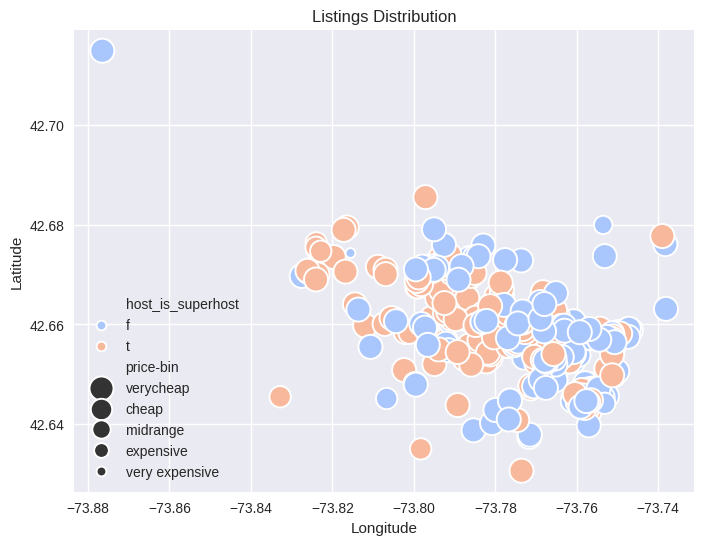

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='longitude', y='latitude', hue='host_is_superhost', size='price-bin', sizes=(50, 300), data=df, palette='coolwarm')
plt.title('Listings Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
df['host_is_superhost'].value_counts()

,count
host_is_superhost,
t,218
f,179


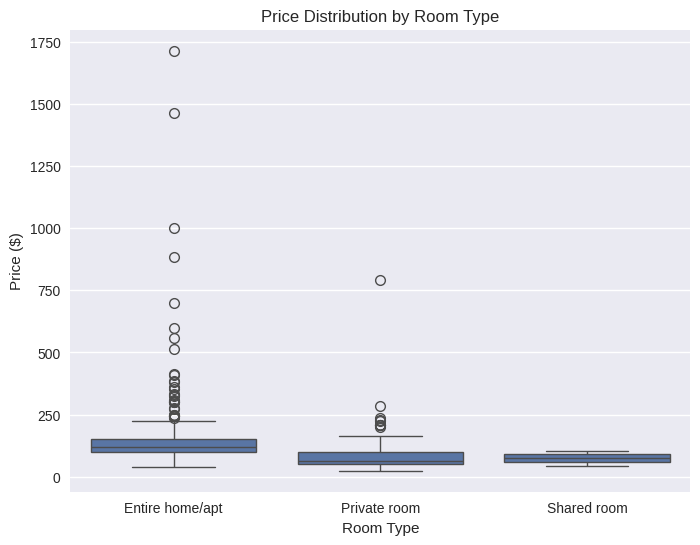

In [ ]:
#checking for price distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()

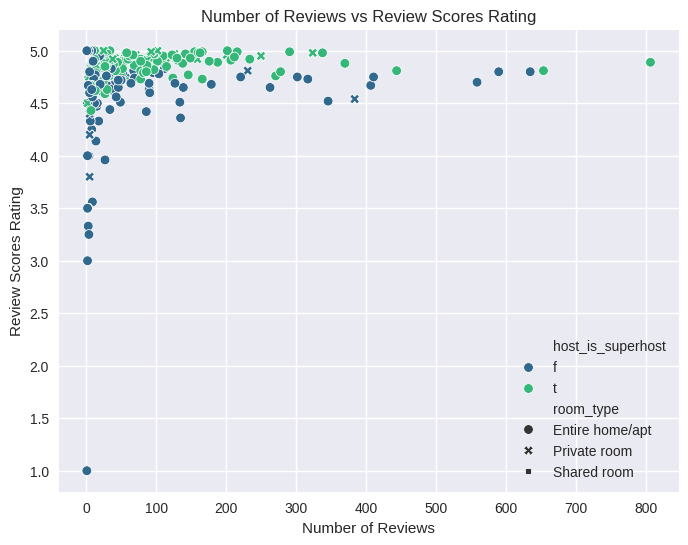

In [ ]:
#checking if super host affect rating and reviews
plt.figure(figsize=(8, 6))
sns.scatterplot(x='number_of_reviews', y='review_scores_rating', hue='host_is_superhost', style='room_type', data=df, palette='viridis')
plt.title('Number of Reviews vs Review Scores Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Review Scores Rating')
plt.show()

<ipython-input-12-5762f0903445>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='room_type', y='availability_30', data=df, palette='Blues_d')


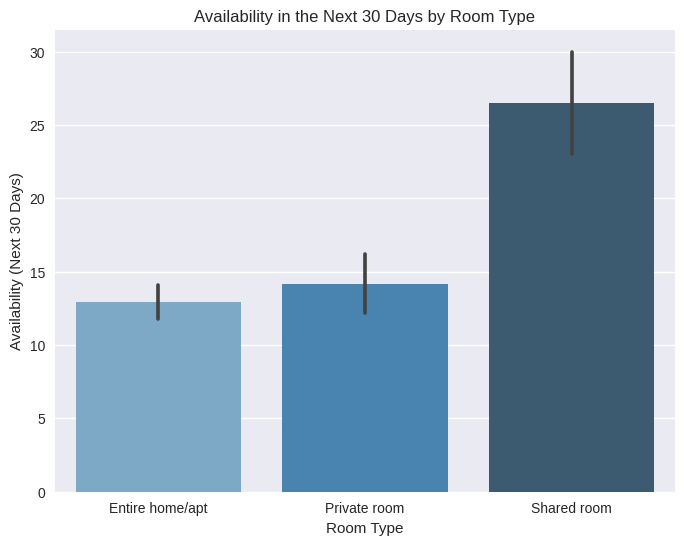

In [ ]:
#30 days availability
plt.figure(figsize=(8, 6))
sns.barplot(x='room_type', y='availability_30', data=df, palette='Blues_d')
plt.title('Availability in the Next 30 Days by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Availability (Next 30 Days)')
plt.show()

In [ ]:
df['number_of_reviews']

,number_of_reviews
0,9
1,302
2,346
3,317
4,56
...,...
397,0
398,0
399,0
400,0


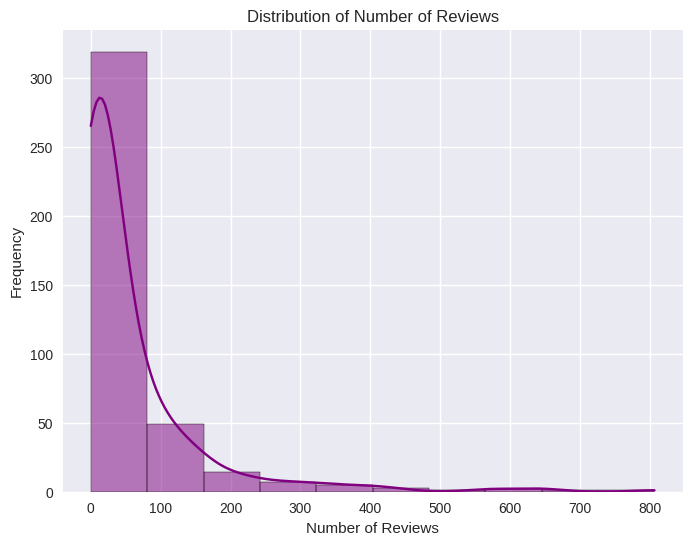

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['number_of_reviews'], bins=10, color='purple', kde=True)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

<ipython-input-15-f1c4053b95c9>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Neighborhood', y='Avg Price ($)', data=neighborhood_insights, palette='viridis')


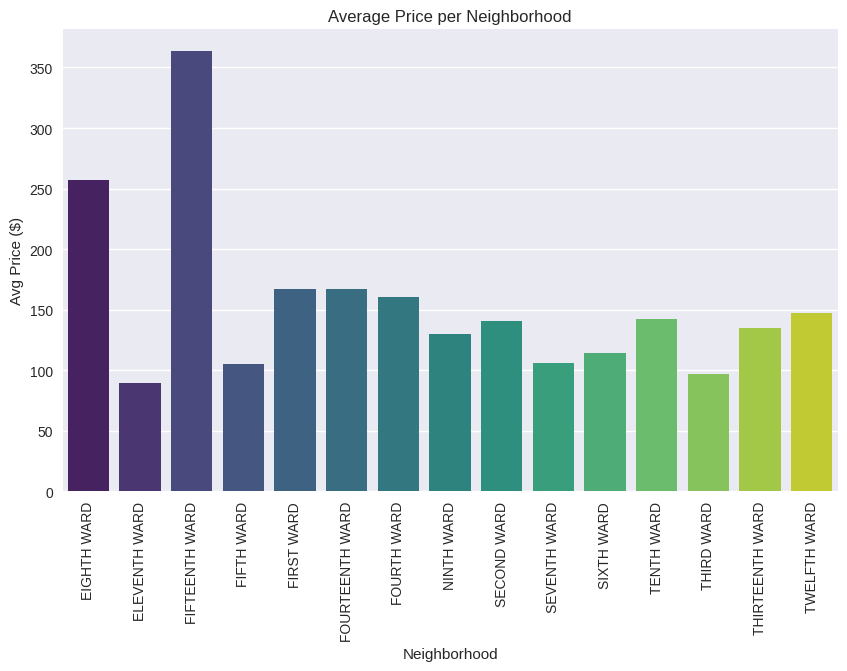

In [ ]:
avg_price_per_neighborhood = df.groupby('neighbourhood_cleansed')['price'].mean().reset_index()

#estimate earning
df['estimated_revenue'] = df['price'] * df['number_of_reviews']
avg_revenue_per_neighborhood = df.groupby('neighbourhood_cleansed')['estimated_revenue'].mean().reset_index()

#occupant rate next 30 days
occupancy_rate_per_neighborhood = df.groupby('neighbourhood_cleansed')['availability_30'].mean().reset_index()

# Merging all data
neighborhood_insights = avg_price_per_neighborhood.merge(avg_revenue_per_neighborhood, on='neighbourhood_cleansed')
neighborhood_insights = neighborhood_insights.merge(occupancy_rate_per_neighborhood, on='neighbourhood_cleansed')
neighborhood_insights.columns = ['Neighborhood', 'Avg Price ($)', 'Avg Estimated Revenue ($)', 'Avg Availability (30 days)']

#Avg Price per Neighborhood
plt.figure(figsize=(10, 6))
sns.barplot(x='Neighborhood', y='Avg Price ($)', data=neighborhood_insights, palette='viridis')
plt.title('Average Price per Neighborhood')
plt.xticks(rotation=90)
plt.show()


<ipython-input-16-427a3059741c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Neighborhood', y='Avg Estimated Revenue ($)', data=neighborhood_insights, palette='viridis')


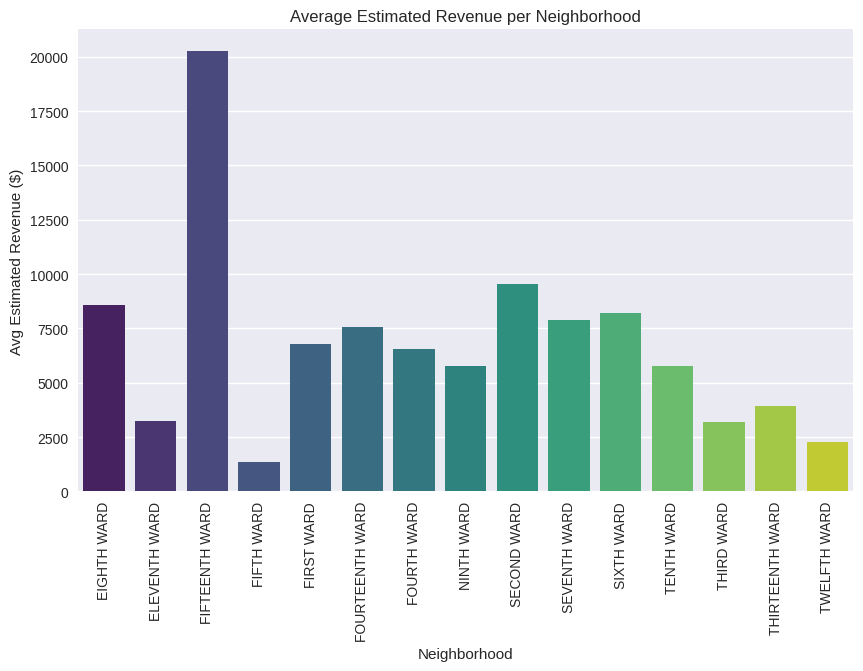

In [ ]:
# average estimate earning
plt.figure(figsize=(10, 6))
sns.barplot(x='Neighborhood', y='Avg Estimated Revenue ($)', data=neighborhood_insights, palette='viridis')
plt.title('Average Estimated Revenue per Neighborhood')
plt.xticks(rotation=90)
plt.show()

<ipython-input-17-5533b2cc92a9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Neighborhood', y='Avg Availability (30 days)', data=neighborhood_insights, palette='viridis')


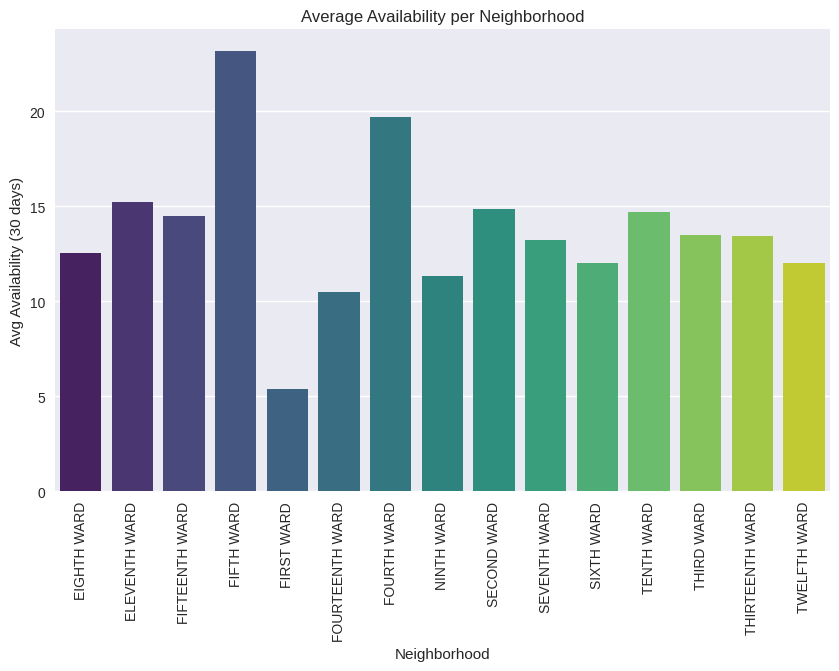

In [ ]:
#avalability next 30 days
plt.figure(figsize=(10, 6))
sns.barplot(x='Neighborhood', y='Avg Availability (30 days)', data=neighborhood_insights, palette='viridis')
plt.title('Average Availability per Neighborhood')
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x600 with 0 Axes>

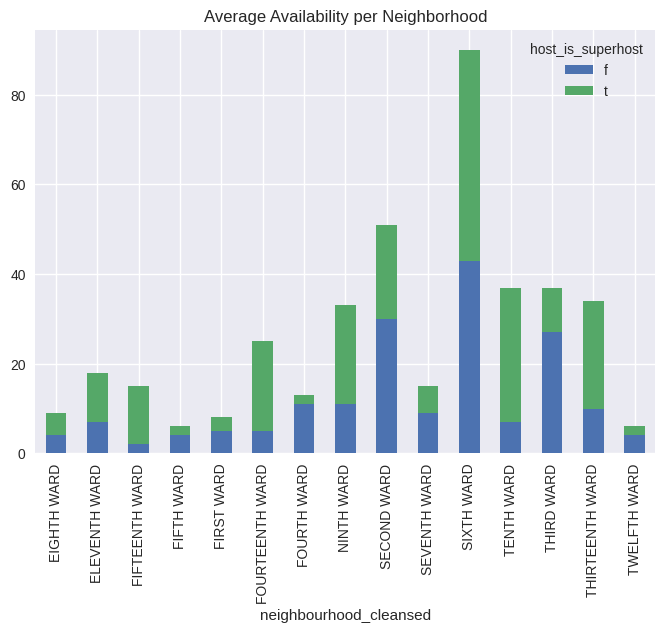

In [ ]:
super_hostllocation = df.groupby(['neighbourhood_cleansed','host_is_superhost']).size().unstack()
plt.figure(figsize=(10, 6))
super_hostllocation.plot(kind='bar',stacked= True)
plt.title('Average Availability per Neighborhood')
plt.xticks(rotation=90)
plt.show()

<ipython-input-19-b0250a256e79>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_review_property_type = df.groupby(['room_type','review-bin']).size().unstack()


<Figure size 1000x600 with 0 Axes>

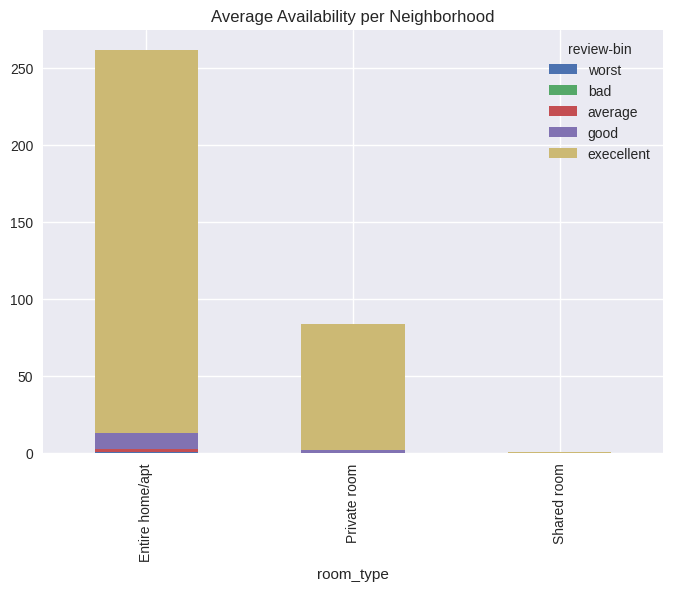

In [ ]:
# define the bin edges
bins1 = [0,1, 2, 3, 4, 5]
labels1 = ['worst','bad', 'average', 'good', 'execellent']
# bin the age column
df['review-bin'] = pd.cut(df['review_scores_rating'], bins1 , labels=labels1)

avg_review_property_type = df.groupby(['room_type','review-bin']).size().unstack()
plt.figure(figsize=(10, 6))
avg_review_property_type.plot(kind='bar',stacked= True)
plt.title('Average Availability per Neighborhood')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.head(5)

,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price-bin,estimated_revenue,review-bin
0,"New York, NY",within a few hours,100%,100%,f,NaN,1,5,"['email', 'phone']",f,NaN,THIRD WARD,42.65789,-73.75370,Entire rental unit,Entire home/apt,4,1.0,2.0,2.0,"[""Essentials"", ""Air conditioning"", ""Wifi"", ""Ki...",70.0,28,1125,28.0,1125.0,t,0,0,0,68,9,0,0,3.56,3.44,3.56,4.22,4.56,3.22,3.67,f,1,1,0,0,0.07,verycheap,630.0,good
1,NaN,within an hour,100%,66%,f,Center Square & Hudson/Park,4,7,"['email', 'phone']",t,Neighborhood highlights,SIXTH WARD,42.65222,-73.76724,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""Free washer \u2013 In unit"", ""Free parking o...",118.0,2,1125,2.8,1125.0,t,0,0,0,253,302,16,0,4.75,4.89,4.88,4.86,4.81,4.82,4.79,f,4,4,0,0,2.53,verycheap,35636.0,execellent
2,"Albany, NY",within an hour,100%,99%,f,NaN,2,2,"['email', 'phone', 'work_email']",t,Neighborhood highlights,SECOND WARD,42.64615,-73.75966,Entire rental unit,Entire home/apt,2,1.0,0.0,1.0,"[""Lockbox"", ""Dedicated workspace"", ""Self check...",75.0,1,45,1.4,1125.0,t,23,48,61,61,346,30,3,4.52,4.62,4.46,4.82,4.87,4.78,4.64,f,2,1,1,0,3.13,verycheap,25950.0,execellent
3,NaN,within an hour,100%,66%,f,Center Square & Hudson/Park,4,7,"['email', 'phone']",t,Neighborhood highlights,SIXTH WARD,42.65222,-73.76724,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""Washer"", ""Self check-in"", ""Keypad"", ""Microwa...",131.0,2,1125,2.7,1125.0,t,16,44,74,349,317,14,1,4.73,4.83,4.72,4.82,4.69,4.80,4.72,f,4,4,0,0,2.89,verycheap,41527.0,execellent
4,NaN,within a day,50%,53%,f,NaN,2,3,"['email', 'phone']",t,Neighborhood highlights,TENTH WARD,42.66088,-73.78147,Entire home,Entire home/apt,6,3.5,3.0,3.0,"[""Kitchen"", ""Exterior security cameras on prop...",305.0,2,1125,2.0,1125.0,t,28,43,73,348,56,4,0,4.75,4.81,4.78,4.92,4.80,4.74,4.75,f,2,1,1,0,0.52,cheap,17080.0,execellent


In [ ]:
avg_review_property_type

review-bin,worst,bad,average,good,execellent
room_type,,,,,
Entire home/apt,1,0,2,10,249
Private room,0,0,0,2,82
Shared room,0,0,0,0,1


In [ ]:
df.head(5)

,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price-bin,estimated_revenue,review-bin
0,"New York, NY",within a few hours,100%,100%,f,NaN,1,5,"['email', 'phone']",f,NaN,THIRD WARD,42.65789,-73.75370,Entire rental unit,Entire home/apt,4,1.0,2.0,2.0,"[""Essentials"", ""Air conditioning"", ""Wifi"", ""Ki...",70.0,28,1125,28.0,1125.0,t,0,0,0,68,9,0,0,3.56,3.44,3.56,4.22,4.56,3.22,3.67,f,1,1,0,0,0.07,verycheap,630.0,good
1,NaN,within an hour,100%,66%,f,Center Square & Hudson/Park,4,7,"['email', 'phone']",t,Neighborhood highlights,SIXTH WARD,42.65222,-73.76724,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""Free washer \u2013 In unit"", ""Free parking o...",118.0,2,1125,2.8,1125.0,t,0,0,0,253,302,16,0,4.75,4.89,4.88,4.86,4.81,4.82,4.79,f,4,4,0,0,2.53,verycheap,35636.0,execellent
2,"Albany, NY",within an hour,100%,99%,f,NaN,2,2,"['email', 'phone', 'work_email']",t,Neighborhood highlights,SECOND WARD,42.64615,-73.75966,Entire rental unit,Entire home/apt,2,1.0,0.0,1.0,"[""Lockbox"", ""Dedicated workspace"", ""Self check...",75.0,1,45,1.4,1125.0,t,23,48,61,61,346,30,3,4.52,4.62,4.46,4.82,4.87,4.78,4.64,f,2,1,1,0,3.13,verycheap,25950.0,execellent
3,NaN,within an hour,100%,66%,f,Center Square & Hudson/Park,4,7,"['email', 'phone']",t,Neighborhood highlights,SIXTH WARD,42.65222,-73.76724,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""Washer"", ""Self check-in"", ""Keypad"", ""Microwa...",131.0,2,1125,2.7,1125.0,t,16,44,74,349,317,14,1,4.73,4.83,4.72,4.82,4.69,4.80,4.72,f,4,4,0,0,2.89,verycheap,41527.0,execellent
4,NaN,within a day,50%,53%,f,NaN,2,3,"['email', 'phone']",t,Neighborhood highlights,TENTH WARD,42.66088,-73.78147,Entire home,Entire home/apt,6,3.5,3.0,3.0,"[""Kitchen"", ""Exterior security cameras on prop...",305.0,2,1125,2.0,1125.0,t,28,43,73,348,56,4,0,4.75,4.81,4.78,4.92,4.80,4.74,4.75,f,2,1,1,0,0.52,cheap,17080.0,execellent


In [ ]:
import re

df['amenities'] = df['amenities'].str.replace('[', '')
df['amenities'] = df['amenities'].str.replace(']', '')
#df['amenities'] = df['amenities'].apply(lambda x: re.sub(r'\\u[0-9A-Fa-f]+', '', x))  # Removes Unicode like \u2013
#df['amenities'] = df['amenities'].apply(lambda x: re.sub(r'\\n', '', x))  # Removes new line characters \n


In [ ]:
df['amenities'].value_counts()

,count
amenities,
"""Body soap"", ""Free parking on premises"", ""Shared hot tub - available all year, open 24 hours"", ""Blender"", ""Lock on bedroom door"", ""Keypad"", ""Hot water kettle"", ""Dishwasher"", ""Hair dryer"", ""Cleaning products"", ""Dedicated workspace"", ""Clothing storage"", ""Self check-in"", ""TV"", ""Stove"", ""Long term stays allowed"", ""Fire pit"", ""Backyard"", ""Outdoor dining area"", ""Extra pillows and blankets"", ""Heating"", ""Refrigerator"", ""Bed linens"", ""Hangers"", ""Dining table"", ""Iron"", ""Coffee maker"", ""Washer"", ""Coffee"", ""Wifi"", ""Dishes and silverware"", ""BBQ grill"", ""Air conditioning"", ""Conditioner"", ""Kitchen"", ""Luggage dropoff allowed"", ""Essentials"", ""Microwave"", ""Hot water"", ""Free street parking"", ""Board games"", ""Oven"", ""Smoke alarm"", ""Exterior security cameras on property"", ""Carbon monoxide alarm"", ""Freezer"", ""Dryer"", ""Cooking basics"", ""First aid kit"", ""Noise decibel monitors on property"", ""Fire extinguisher"", ""Shampoo""",2
"""Dedicated workspace"", ""Self check-in"", ""Air conditioning"", ""First aid kit"", ""Wifi"", ""Hair dryer"", ""Kitchen"", ""Cooking basics"", ""Smoke alarm"", ""Carbon monoxide alarm"", ""Fire extinguisher"", ""Smart lock"", ""Heating"", ""Iron"", ""TV""",1
"""Stainless steel single oven"", ""Private patio or balcony"", ""50 inch HDTV with Roku"", ""Wine glasses"", ""Window AC unit"", ""Dining table"", ""Conditioner"", ""Coffee maker: drip coffee maker"", ""Fireplace guards"", ""Self check-in"", ""Keypad"", ""Microwave"", ""Hair dryer"", ""Hangers"", ""Hot water"", ""Room-darkening shades"", ""Smoke alarm"", ""Toaster"", ""Private entrance"", ""Free washer \u2013 In unit"", ""Shampoo"", ""Essentials"", ""Laundromat nearby"", ""Dishwasher"", ""Coffee"", ""Extra pillows and blankets"", ""Body soap"", ""Shower gel"", ""Dishes and silverware"", ""Barbecue utensils"", ""Ethernet connection"", ""Portable fans"", ""Clothing storage: closet and dresser"", ""Carbon monoxide alarm"", ""Bed linens"", ""Indoor fireplace: electric"", ""Fire extinguisher"", ""Free street parking"", ""Outdoor furniture"", ""Outdoor dining area"", ""Long term stays allowed"", ""Cleaning products"", ""Radiant heating"", ""First aid kit"", ""Wifi"", ""Baking sheet"", ""Refrigerator"", ""Cooking basics"", ""Freezer"", ""Samsung stainless steel gas stove"", ""Free dryer \u2013 In unit"", ""Shared backyard \u2013 Not fully fenced"", ""Kitchen"", ""Iron""",1
"""Stainless steel single oven"", ""Exterior security cameras on property"", ""Wine glasses"", ""Dining table"", ""Shared patio or balcony"", ""Conditioner"", ""Coffee maker: drip coffee maker"", ""Stainless steel gas stove"", ""Self check-in"", ""Keypad"", ""Microwave"", ""Hair dryer"", ""Hangers"", ""Hot water"", ""Room-darkening shades"", ""Smoke alarm"", ""Toaster"", ""Hot water kettle"", ""Private entrance"", ""Free washer \u2013 In unit"", ""Shampoo"", ""Essentials"", ""Laundromat nearby"", ""Dishwasher"", ""Coffee"", ""BBQ grill: gas"", ""Free parking on premises"", ""Extra pillows and blankets"", ""Body soap"", ""Shower gel"", ""Dishes and silverware"", ""Barbecue utensils"", ""Ethernet connection"", ""Movie theater"", ""Carbon monoxide alarm"", ""Fire extinguisher"", ""Bed linens"", ""Free street parking"", ""Pets allowed"", ""TV"", ""Blender"", ""Luggage dropoff allowed"", ""Long term stays allowed"", ""Cleaning products"", ""First aid kit"", ""Wifi"", ""Baking sheet"", ""Refrigerator"", ""Cooking basics"", ""Freezer"", ""Outdoor kitchen"", ""Free dryer \u2013 In unit"", ""Central air conditioning"", ""Shared backyard \u2013 Not fully fenced"", ""Kitchen"", ""Central heating"", ""Iron""",1
"""Samsung stainless steel electric stove"", ""Kitchen"", ""Exterior security cameras on property"", ""Wine glasses"", ""Window AC unit"", ""Dining table"", ""Fireplace guards"", ""Self check-in"", ""Keypad"", ""Microwave"", ""Hair dryer"", ""Hangers"", ""Hot water"", ""Room-darkening shades"", ""

In [ ]:
import ast
from collections import Counter

def safe_parse_amenities(amenity_string):
    try:
        # Attempt to parse the string as a list
        return ast.literal_eval(amenity_string)
    except (ValueError, SyntaxError):
        # If parsing fails, return the original string or an empty list
        return []

# Apply the safe parsing function to each row in the 'amenities' column
df['amenities'] = df['amenities'].apply(safe_parse_amenities)

# Check the first few entries after cleaning
print(df['amenities'].head())

0    (Essentials, Air conditioning, Wifi, Kitchen, ...
1    (Free washer – In unit, Free parking on premis...
2    (Lockbox, Dedicated workspace, Self check-in, ...
3    (Washer, Self check-in, Keypad, Microwave, Hai...
4    (Kitchen, Exterior security cameras on propert...
Name: amenities, dtype: object


<ipython-input-26-8a04e98ae196>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Amenity', data=top_30_amenities, palette='coolwarm')


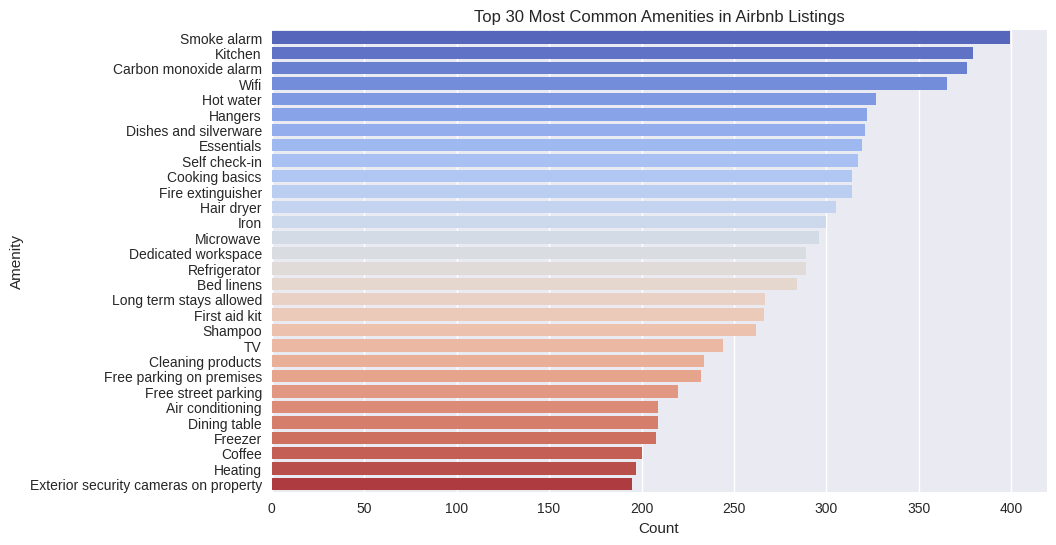

In [ ]:
all_amenities = [amenity for sublist in df['amenities'] for amenity in sublist]

# Count the frequency of each amenity
amenity_counts = Counter(all_amenities)

# Convert the counts into a DataFrame for visualization
amenity_df = pd.DataFrame(amenity_counts.items(), columns=['Amenity', 'Count']).sort_values(by='Count', ascending=False)

amenity_counts = Counter(all_amenities)

# Convert the counts into a DataFrame for visualization
amenity_df = pd.DataFrame(amenity_counts.items(), columns=['Amenity', 'Count']).sort_values(by='Count', ascending=False)

# Show only the top 30 amenities
top_30_amenities = amenity_df.head(30)

# Plot the top 30 most common amenities
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Amenity', data=top_30_amenities, palette='coolwarm')
plt.title('Top 30 Most Common Amenities in Airbnb Listings')
plt.xlabel('Count')
plt.ylabel('Amenity')
plt.show()

<Figure size 1200x600 with 0 Axes>

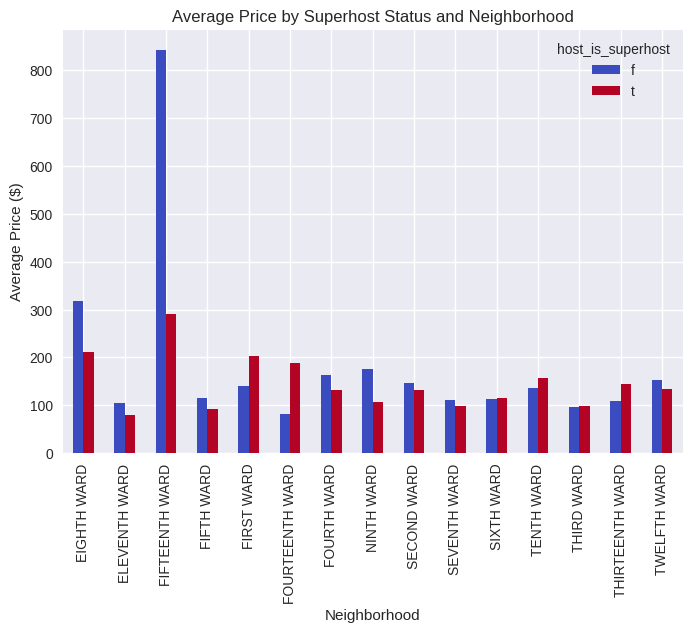

In [ ]:
# Calculate average price for superhosts and non-superhosts by neighborhood
avg_price_superhost = df.groupby(['neighbourhood_cleansed', 'host_is_superhost'])['price'].mean().unstack()

# Plot the average prices
plt.figure(figsize=(12, 6))
avg_price_superhost.plot(kind='bar', colormap='coolwarm')
plt.title('Average Price by Superhost Status and Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.show()

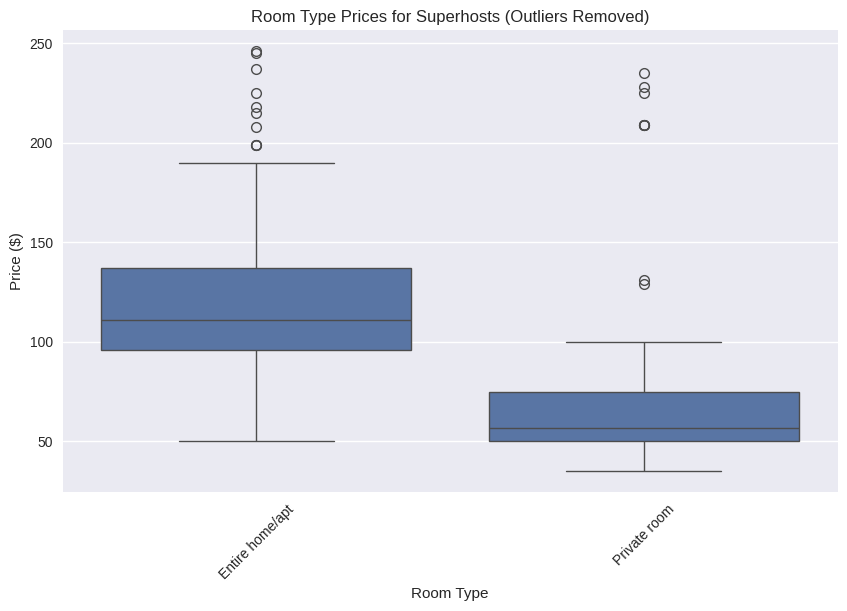

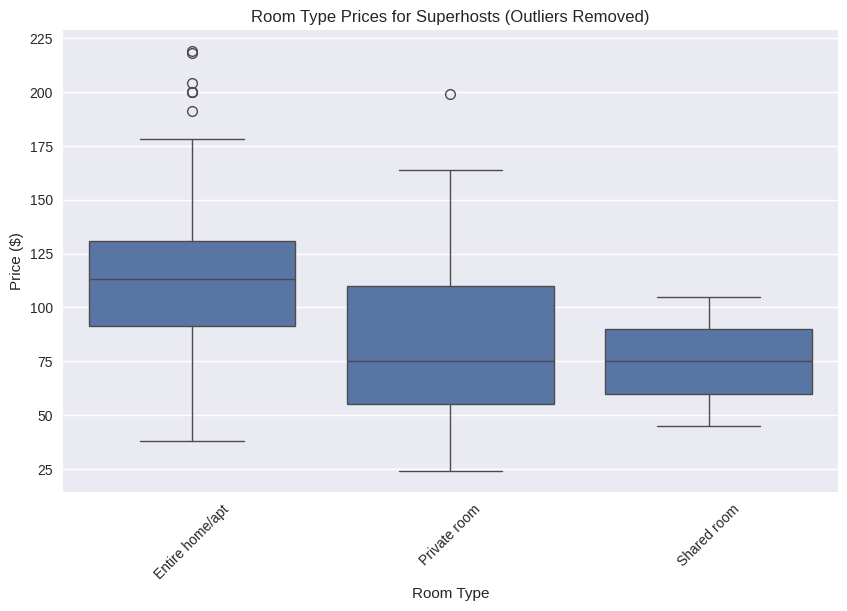

In [ ]:
# Filtersuperhosts
superhost_df = df[df['host_is_superhost'] == 't']

# IQR
Q1 = superhost_df['price'].quantile(0.25)
Q3 = superhost_df['price'].quantile(0.75)
IQR = Q3 - Q1
filtered_superhost_df = superhost_df[(superhost_df['price'] >= (Q1 - 1.5 * IQR)) & (superhost_df['price'] <= (Q3 + 1.5 * IQR))]


# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=filtered_superhost_df)
plt.title('Room Type Prices for Superhosts (Outliers Removed)')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=filtered_superhost_dff)
plt.title('Room Type Prices for Superhosts (Outliers Removed)')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

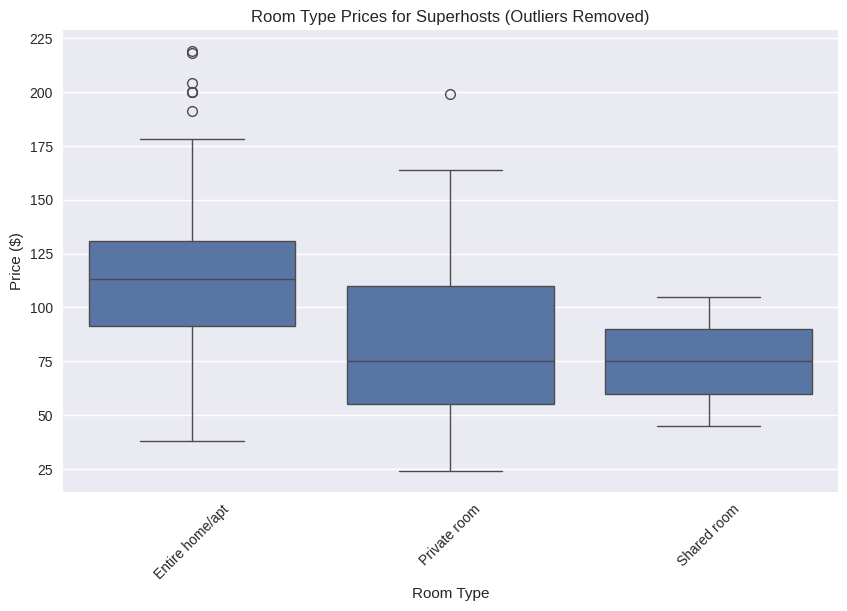

In [ ]:
# Filtersuperhosts
superhost_dff = df[df['host_is_superhost'] == 'f']

# IQR
Q1 = superhost_dff['price'].quantile(0.25)
Q3 = superhost_dff['price'].quantile(0.75)
IQR = Q3 - Q1
filtered_superhost_dff = superhost_dff[(superhost_dff['price'] >= (Q1 - 1.5 * IQR)) & (superhost_dff['price'] <= (Q3 + 1.5 * IQR))]


# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=filtered_superhost_dff)
plt.title('Room Type Prices for Superhosts (Outliers Removed)')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

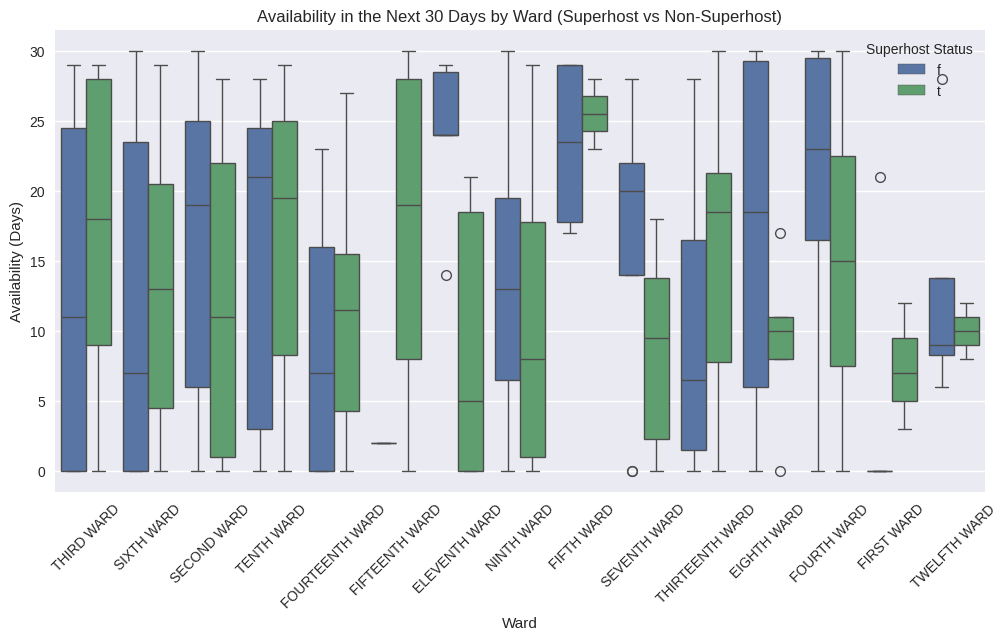

<Figure size 1000x600 with 0 Axes>

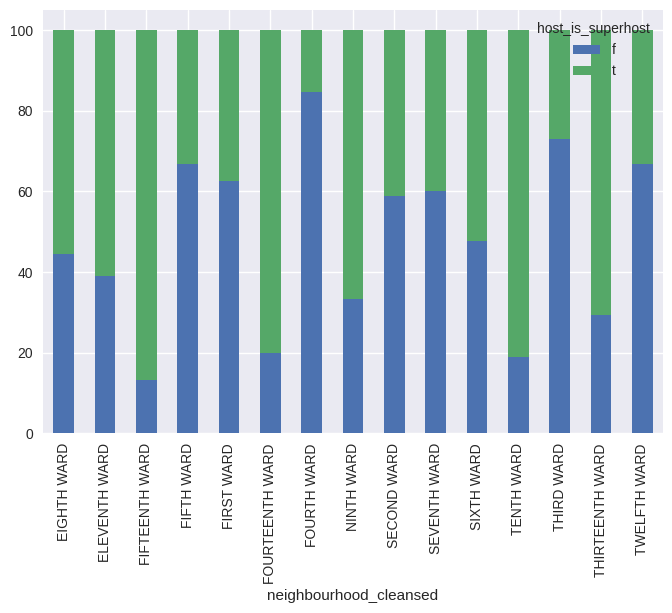

host_is_superhost               f          t
neighbourhood_cleansed                      
FIFTEENTH WARD           2.000000  16.384615
FIFTH WARD              23.250000  25.500000
FIRST WARD               4.200000   7.333333
FOURTEENTH WARD          9.200000  10.800000
SIXTH WARD              11.139535  12.787234
TENTH WARD              14.857143  16.400000
THIRD WARD              12.222222  16.800000
THIRTEENTH WARD          9.700000  15.000000


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_cleansed', y='availability_30', hue='host_is_superhost', data=df)
plt.title('Availability in the Next 30 Days by Ward (Superhost vs Non-Superhost)')
plt.xlabel('Ward')
plt.ylabel('Availability (Days)')
plt.xticks(rotation=45)
plt.legend(title='Superhost Status', loc='upper right')
plt.show()
####
df_neighbourcleansed = df.groupby(['neighbourhood_cleansed','host_is_superhost']).size().unstack()
percentage_neighbourcleaneds = df_neighbourcleansed.div(df_neighbourcleansed.sum(axis=1),axis=0)*100
#plot
plt.figure(figsize=(10,6))
percentage_neighbourcleaneds .plot(kind='bar',stacked =True)
plt.show()



host_is_superhost               f          t
neighbourhood_cleansed                      
EIGHTH WARD             16.750000   9.200000
ELEVENTH WARD           24.571429   9.272727
FOURTH WARD             20.545455  15.000000
NINTH WARD              13.636364  10.181818
SECOND WARD             16.266667  12.857143
SEVENTH WARD            16.222222   8.666667
TWELFTH WARD            13.000000  10.000000


<Figure size 1000x600 with 0 Axes>

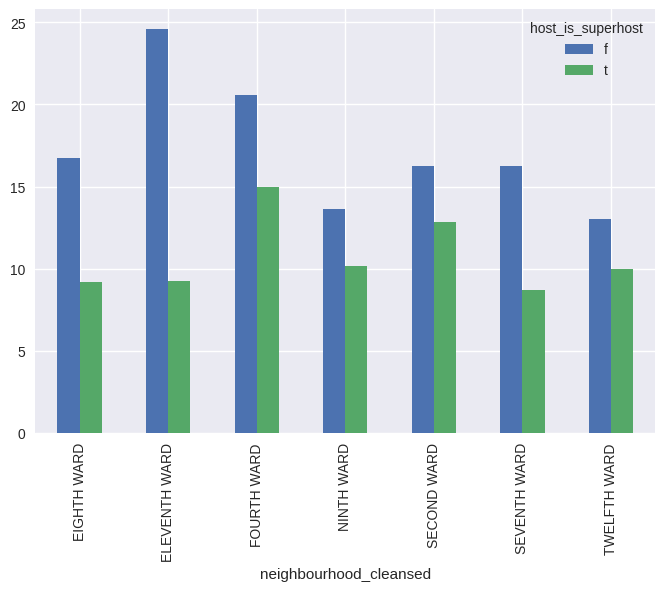

In [ ]:
#groupby (neighbour, host superhost)(availability_30)
availability_30_compare = df.groupby(['neighbourhood_cleansed','host_is_superhost'])['availability_30'].mean().unstack()
availability_30_comparet = availability_30_compare[availability_30_compare['t'] < availability_30_compare['f']]
print(availability_30_comparet)
#plot
plt.figure(figsize=(10,6))
availability_30_comparet.plot(kind='bar',stacked=False)
plt.show()

host_is_superhost        f   t
neighbourhood_cleansed        
EIGHTH WARD              4   5
ELEVENTH WARD            7  11
FOURTH WARD             11   2
NINTH WARD              11  22
SECOND WARD             30  21
SEVENTH WARD             9   6
TWELFTH WARD             4   2


<Figure size 1000x600 with 0 Axes>

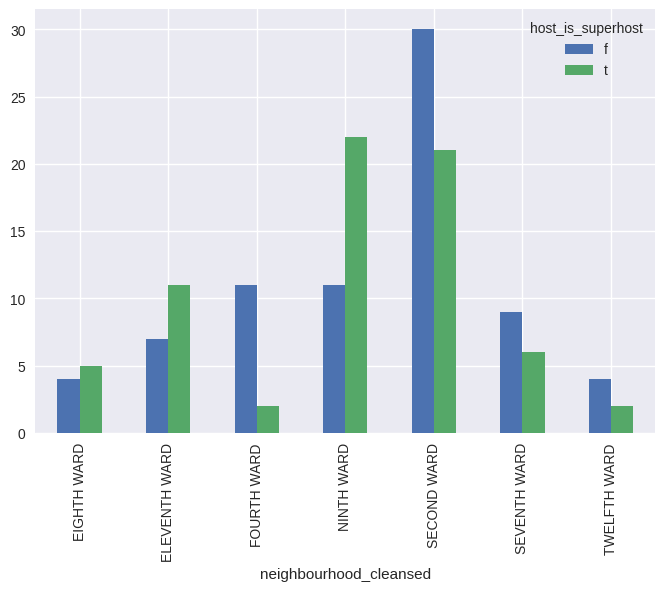

In [ ]:
ward = ['EIGHTH WARD','ELEVENTH WARD','FOURTH WARD','NINTH WARD','SECOND WARD','SEVENTH WARD','TWELFTH WARD']
filtert =  df[df['neighbourhood_cleansed'].isin(ward)]
ward_count = filtert.groupby(['neighbourhood_cleansed','host_is_superhost']).size().unstack()
print(ward_count)
#PLOT
plt.figure(figsize=(10,6))
ward_count.plot(kind='bar',stacked=False)
plt.show()

In [ ]:
filtert['host_is_superhost'].value_counts()

,count
host_is_superhost,
f,76
t,69


In [ ]:
df['host_is_superhost'].value_counts()

,count
host_is_superhost,
t,218
f,179


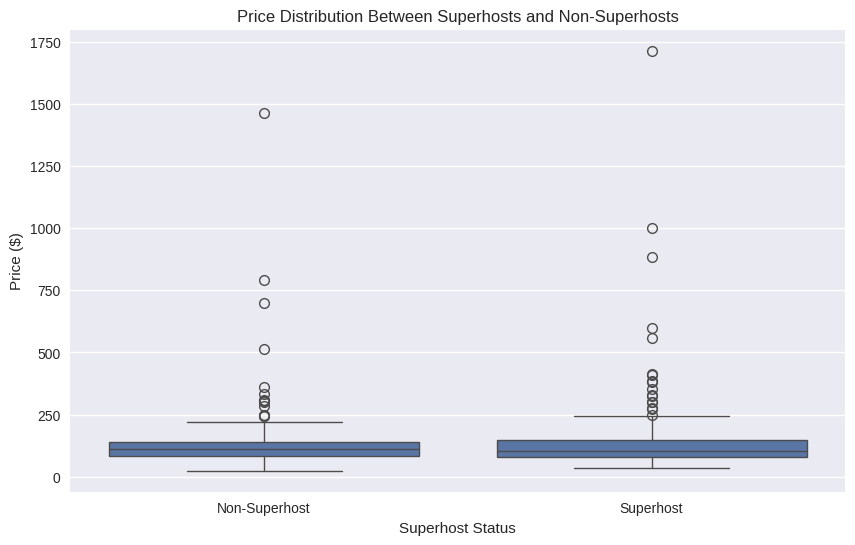

In [ ]:
# Create a box plot comparing the price distribution between superhosts and non-superhosts
plt.figure(figsize=(10, 6))
sns.boxplot(x='host_is_superhost', y='price', data=df)
plt.title('Price Distribution Between Superhosts and Non-Superhosts')
plt.xlabel('Superhost Status')
plt.ylabel('Price ($)')
plt.xticks([0, 1], ['Non-Superhost', 'Superhost'])  # Custom labels for the x-axis
plt.show()